<a href="https://colab.research.google.com/github/Sonia-Herrera/Project-Dataset---Seattle-Airbnb-Data/blob/main/Seattle_Airbnb_Correcion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT: Seattle Airbnb**


---


For this project, some public Airbnb data available below is taken. Inspired by Robert's work on data analytics, I'm going to try to answer 3 questions that start from the data.

*   What is the Top 10 most popular neighborhoods for Airbnb in Seattle?
*   What is the busiest season for properties in Seattle?
*   According to the qualification that the properties have, what is their average price?

**Libraries**

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Load Data**


---


We will load the data set and select the relevant variables to be able to answer the first question

In [ ]:
usecols = ['id', 'neighbourhood', 'property_type', 'price', 'review_scores_value']
cal = pd.read_csv('calendar.csv')
rev = pd.read_csv('reviews.csv')
lis = pd.read_csv('listings.csv',usecols=usecols)
lis.head()


,id,neighbourhood,property_type,price,review_scores_value
0,241032,Queen Anne,Apartment,$85.00,10.0
1,953595,Queen Anne,Apartment,$150.00,10.0
2,3308979,Queen Anne,House,$975.00,10.0
3,7421966,Queen Anne,Apartment,$100.00,NaN
4,278830,Queen Anne,House,$450.00,9.0


**1. Top 10 most popular neighborhoods for Airbnb in Seattle**


---
In order to answer this question we must clean the data and for this we must eliminate the properties that do not have a neighborhood related



In [ ]:
# Elimination of dwellings without neighborhood information
lis = lis[~lis['neighbourhood'].isnull()]

We selected the 10 neighborhoods with the highest number of properties in Seattle. For this, an ordered count is carried out from highest to lowest and finally we draw the list with the first 10 neighborhoods



In [ ]:
# Taking into account the number of neighborhoods that Seattle has, 
#the top 10 of the most popular locations will be taken
top_10 = lis.groupby(['neighbourhood'])['id'].count().sort_values(ascending = False).head(10)
top_10

neighbourhood
Capitol Hill           351
Ballard                213
Belltown               204
Minor                  192
Queen Anne             187
Fremont                148
Wallingford            143
University District    107
First Hill             105
Stevens                 98
Name: id, dtype: int64

In [ ]:
# Let's group the top 10 most popular neighborhoods into a 'top_10' list
top10_neighborhoods = list(top_10.index)
top10_neighborhoods

['Capitol Hill',
 'Ballard',
 'Belltown',
 'Minor',
 'Queen Anne',
 'Fremont',
 'Wallingford',
 'University District',
 'First Hill',
 'Stevens']

Already having the 10 best neighborhoods in Seattle, we use this data to group according to the type of housing and from this classification to carry out a count.

In [ ]:
# We will group the houses according to their location by neighborhood, 
#the type of residence and how many properties are available for each type of property

property_types = lis.groupby(['neighbourhood','property_type'], as_index = False)['id'].count()
property_types = (property_types.
                        sort_values(by = 'id', ascending = False)
                       ) 

property_types.head()

,neighbourhood,property_type,id
41,Capitol Hill,Apartment,254
22,Belltown,Apartment,181
19,Ballard,House,136
171,Minor,House,110
280,Wallingford,House,98


In [ ]:
# We already have the houses grouped by neighborhoods, we will filter by our list of top_10 that we have previously
property_types = property_types[property_types['neighbourhood'].isin(top10_neighborhoods)]

print(property_types['neighbourhood'].unique())
property_types.head()

['Capitol Hill' 'Belltown' 'Ballard' 'Minor' 'Wallingford' 'First Hill'
 'Queen Anne' 'Fremont' 'University District' 'Stevens']


,neighbourhood,property_type,id
41,Capitol Hill,Apartment,254
22,Belltown,Apartment,181
19,Ballard,House,136
171,Minor,House,110
280,Wallingford,House,98


**Graph**

---

In order to graph, we are going to use the count of the subgroup of dwellings (type).
The id variable is generating an error and the function is not reading it correctly, so we are going to create a new variable that contains the same information (housing count)

In [ ]:
# Generate a new column with the housing count for use in sunray graph
property_types['Housing count'] = property_types['id']
print(property_types['neighbourhood'].unique())
property_types.head()

['Capitol Hill' 'Belltown' 'Ballard' 'Minor' 'Wallingford' 'First Hill'
 'Queen Anne' 'Fremont' 'University District' 'Stevens']


,neighbourhood,property_type,id,Housing count
41,Capitol Hill,Apartment,254,254
22,Belltown,Apartment,181,181
19,Ballard,House,136,136
171,Minor,House,110,110
280,Wallingford,House,98,98


We created the sunray graphic that is spectacular. With this design it is very dynamic to be able to see the composition of the most popular neighborhoods and their composition by type of housing

In [ ]:
# In order to see the distribution of the types of properties 
#according to the top 10 neighborhoods in Seattle we will make a sunray graph
import plotly.express as px




In [ ]:


figure = px.sunburst(property_types, values = 'Housing count', path = ['neighbourhood','property_type'], 
                     width = 600, height = 600, title = 'Distribution of the type of property')
figure.update_traces(textinfo="label+percent parent")
figure.show()

In [ ]:
lis.to_excel('property_types.xlsx')

**Results**


---

Capitol Hill and Ballard are the most popular neighborhoods in Seattle, but even so their composition by type of housing is very different, since in Capitol Hill apartments are more popular while in Ballard houses are more popular.

**2. High Seasons in Seattle Airbnb**

---
To answer this question we must organize the data to see which properties are available and thus be able to calculate the occupancy rate.


In [ ]:
# We are going to see the occupancy rate 
# for this we will return the availability variable to binary and we will group it by date
cal['available'] = cal['available'].map(lambda available: 1 if available == 't' else 0)
cal['available'].value_counts()

1    934542
0    459028
Name: available, dtype: int64

In [ ]:
# Calculation of the occupancy rate
occup = cal[['date', 'available']].groupby('date').mean()
occup['occupancy'] = 1 - occup['available']
occup.head()

,available,occupancy
date,,
2016-01-04,0.454426,0.545574
2016-01-05,0.488999,0.511001
2016-01-06,0.478261,0.521739
2016-01-07,0.465165,0.534835
2016-01-08,0.466737,0.533263


**Graph**

---


In order to see the distribution, we graphed a time series to observe the dates with the highest occupancy rate.

In [ ]:
# import libraries to plot time series
from datetime import datetime
import matplotlib.dates as mdates
from scipy.ndimage import gaussian_filter1d

In [ ]:
def timeplot(data, feat, title):
    """
    draw a time line according to the occupancy rate
    """
    
    plt.figure(figsize=(20,8))
    
    x = [datetime.strptime(date, '%Y-%m-%d') for date in data.index]
    y = data[feat]
    
    # smooth y for visualization
    y_smooth = gaussian_filter1d(y, sigma=5)
    
    # set x tick by month
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    
    plt.title(title)
    plt.plot(x, y_smooth, 'm-')
    plt.show()

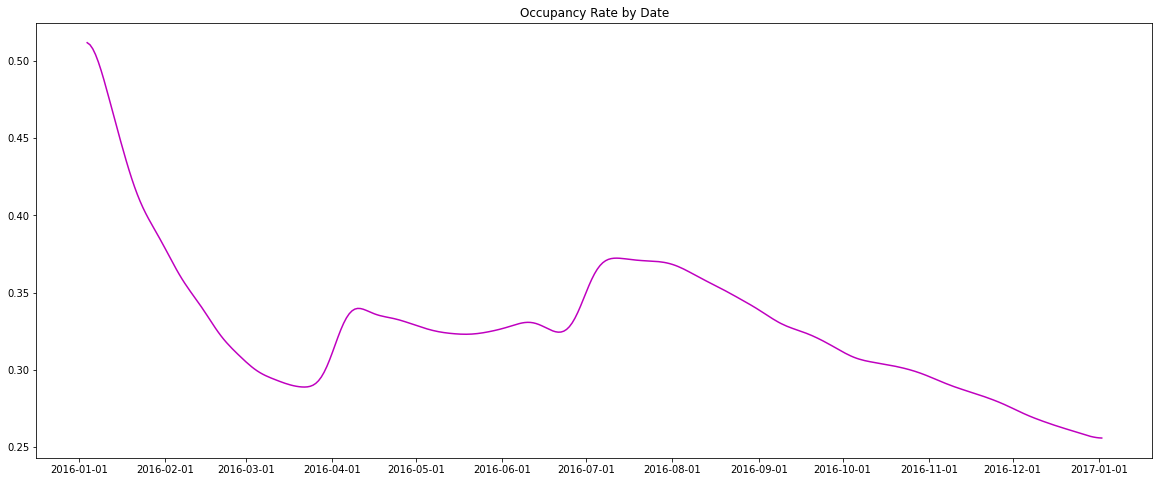

In [ ]:
timeplot(occup, 'occupancy', 'Occupancy Rate by Date')

**Results**

---
We can see that the summer season (June-Aug) is the highest. But for this data set there is a high point in January 2016 that is not repeated in January 2017. We do not have more information to determine what it is due to, but we can assume that there was a great reception to the Seattle Center Winterfest that is held in December and beginning of January.


**3. Level of Satisfaction**

---
Within the data set we have the rating that the properties obtained and their price. At this point we will eliminate the records that do not have a rating and we will fix the prices so that they are numerical data and we can work with them.




In [ ]:
# We will remove the records of the properties that do not have a rating
lis_nan = lis_nan[~lis_nan['review_scores_value'].isnull()]

replacement = {'\$':'', ',':''}
lis_nan['price'] = (lis_nan['price']
                  .replace(replacement, regex = True)
                  .astype('float')) 
lis_nan.head()

,id,neighbourhood,property_type,price,review_scores_value
0,241032,Queen Anne,Apartment,85.0,10.0
1,953595,Queen Anne,Apartment,150.0,10.0
2,3308979,Queen Anne,House,975.0,10.0
4,278830,Queen Anne,House,450.0,9.0
5,5956968,Queen Anne,House,120.0,10.0


With our information ready, I will take 5 rating categories for this we make a distribution with the same number of homes that will indicate the levels of satisfaction in Very Bad, Bad, Indifferent, Good, Excellent

In [ ]:
# The variable review_scores_value will be taken to be able to categorize the properties into 5 groups
# This group will have the same number of homes to be able to observe its impact on prices
category = pd.cut(lis['review_scores_value'].dropna(), 5)
category

0       (8.4, 10.0]
1       (8.4, 10.0]
2       (8.4, 10.0]
4       (8.4, 10.0]
5       (8.4, 10.0]
           ...     
3810     (6.8, 8.4]
3811    (8.4, 10.0]
3812    (8.4, 10.0]
3813     (6.8, 8.4]
3814    (8.4, 10.0]
Name: review_scores_value, Length: 3162, dtype: category
Categories (5, interval[float64, right]): [(1.992, 3.6] < (3.6, 5.2] < (5.2, 6.8] < (6.8, 8.4] <
                                           (8.4, 10.0]]

With the distribution made, we already have the cut-off points to be able to assign the categories in a new variable called Level_Satisfaction

In [ ]:
# Each category will indicate a level of satisfaction for the property
category = pd.cut(lis_nan['review_scores_value'].dropna(), 5,
                   labels = ['Very Bad', 'Bad', 'Indifferent', 'Well', 'Excellent'])
category
lis_nan['Level_Satisfaction'] = category
lis_nan.head()

,id,neighbourhood,property_type,price,review_scores_value,Level_Satisfaction
0,241032,Queen Anne,Apartment,85.0,10.0,Excellent
1,953595,Queen Anne,Apartment,150.0,10.0,Excellent
2,3308979,Queen Anne,House,975.0,10.0,Excellent
4,278830,Queen Anne,House,450.0,9.0,Excellent
5,5956968,Queen Anne,House,120.0,10.0,Excellent


**Graph**

---
Now we can graph my 5 satisfaction level categories but I want to add a calculation to look for a relationship with price.
So I calculate the average price of the property in each of the categories


Text(0.5, 1.0, 'Average Price per Categorization by Level of Satisfaction')

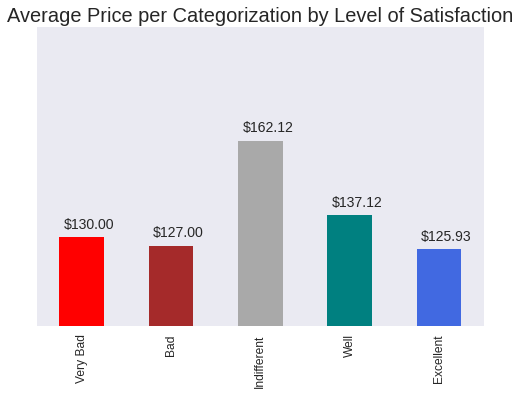

In [ ]:
#Now let's see what our categorization by level of satisfaction looks like and what is its average price
from matplotlib.pyplot import style
style.use('seaborn-v0_8')
groups = lis_nan.groupby('Level_Satisfaction')['price'].mean()
chart = groups.plot(kind = 'bar', ylim = (100,200) , xlabel = '', yticks = [], 
                    fontsize = 12, grid = False, color = ['red','brown', 'darkgrey', 'teal', 'royalblue'])
for i, price in enumerate(groups):
    plt.text(-0.2 + i, price + 3, f'${price:.2f}', fontdict = {'size':14})

plt.title('Average Price per Categorization by Level of Satisfaction', fontdict = {'size':20})


**Results**

---
With our categorization we did not find a correlation with the prices, it may be that the rating given depends on other factors that could be analyzed such as location, property characteristics or perhaps the rating of the host.
